## Import modules

In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set seaborn theme
sns.set(style="whitegrid")

## Loading the dataset

In [3]:
# Importing the dataset as a dataframe
df = pd.read_csv("StudentsPerformance.csv")

In [4]:
# Displaying the dataframe
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
# Finding size of dataframe
df.shape

(1000, 8)

In [6]:
# Printing first 5 rows of the dataframe
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Basic Information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data Cleaning & Preprocessing

In [9]:
# Perform any necessary data cleaning or handling of missing values.
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
# Check unique values in categorical columns
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    print(f"\n{col}:\n", df[col].value_counts())


gender:
 gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity:
 race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level of education:
 parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch:
 lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course:
 test preparation course
none         642
completed    358
Name: count, dtype: int64


In [13]:
# Printing summary statistics of the dataframe
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Exploratory Data Analysis (EDA) Questions

### 1. Which parental education level is linked with the highest average math score?

In [14]:
edu_math = df.groupby('parental level of education')['math score'].mean().sort_values(ascending=False)
print(edu_math)

parental level of education
master's degree       69.745763
bachelor's degree     69.389831
associate's degree    67.882883
some college          67.128319
some high school      63.497207
high school           62.137755
Name: math score, dtype: float64


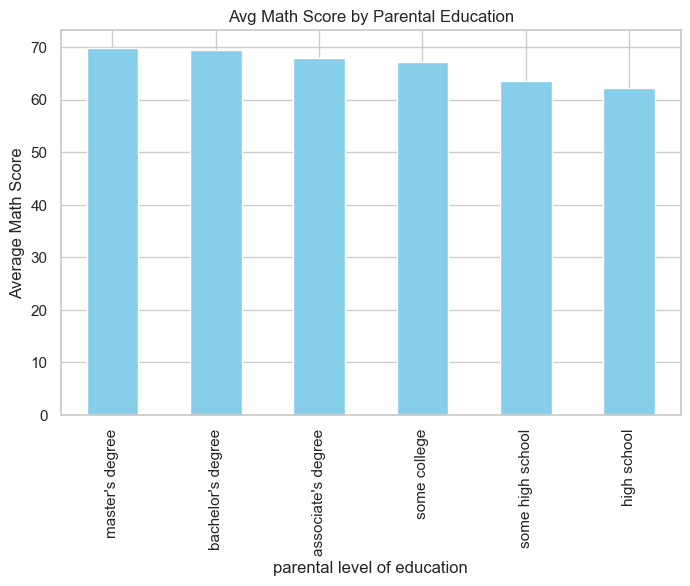

In [16]:
edu_math.plot(kind='bar', title="Avg Math Score by Parental Education", figsize=(8, 5), color='skyblue')
plt.ylabel('Average Math Score')
plt.show()

### 2. Is there a significant score difference between males and females across all subjects?

In [17]:
gender_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(gender_scores)

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


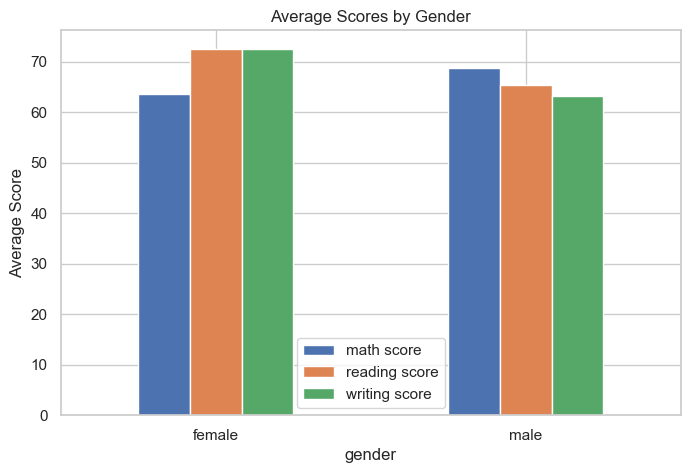

In [18]:
gender_scores.plot(kind='bar', figsize=(8,5), title='Average Scores by Gender')
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

### 3. How much does completing the test preparation course improve performance in each subject?

In [20]:
prep_scores = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print(prep_scores)

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


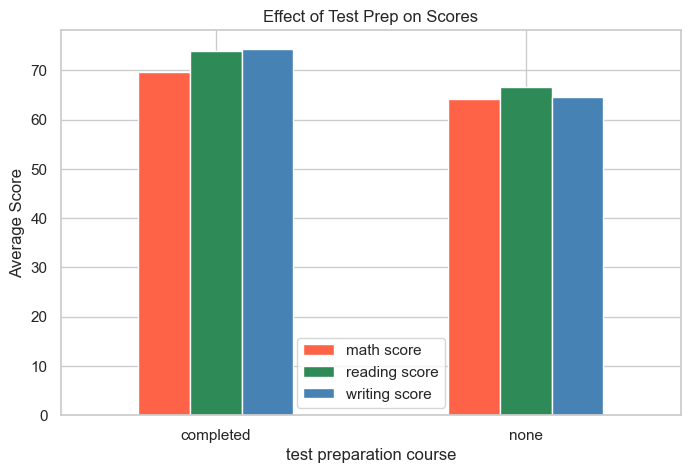

In [21]:
prep_scores.plot(kind='bar', figsize=(8,5), title='Effect of Test Prep on Scores', color=['tomato', 'seagreen', 'steelblue'])
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

### 4. Which combination of gender, lunch type, and test preparation status produces the top 10% of scores?

In [25]:
# Add average score column
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Top 10% students
top_10 = df[df['average score'] >= df['average score'].quantile(0.90)]

# Analyze combinations
top_combo = top_10.groupby(['gender', 'lunch', 'test preparation course']).size().sort_values(ascending=False)
print(top_combo)

gender  lunch         test preparation course
female  standard      none                       31
                      completed                  29
male    standard      completed                  20
                      none                        9
female  free/reduced  completed                   6
male    free/reduced  completed                   3
female  free/reduced  none                        2
male    free/reduced  none                        2
dtype: int64


### 5. Does lunch type have a uniform impact across all race/ethnicity groups, or does its effect vary?

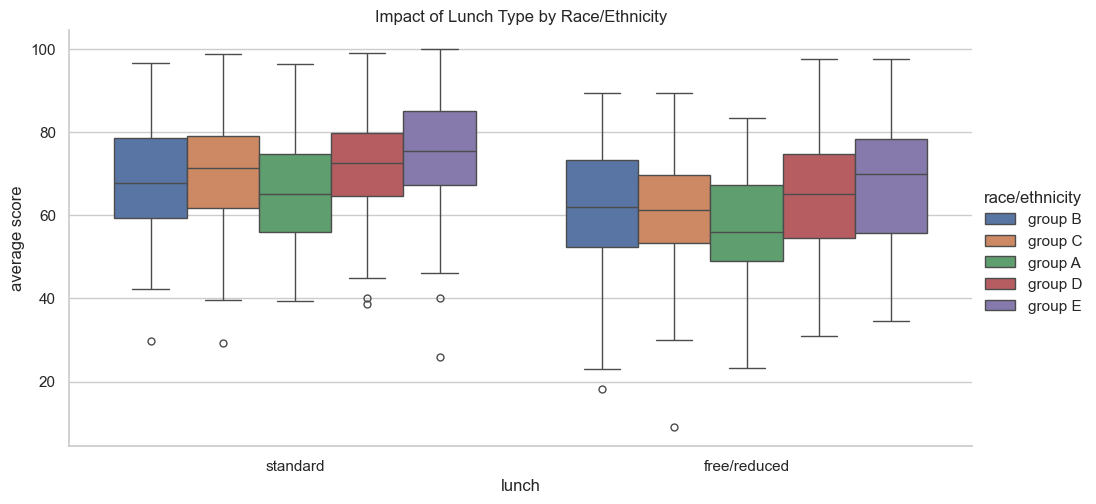

In [27]:
sns.catplot(data=df, x='lunch', y='average score', hue='race/ethnicity', kind='box', height=5, aspect=2)
plt.title('Impact of Lunch Type by Race/Ethnicity')
plt.show()

### 6. What is the correlation between reading and writing scores? Is it stronger than math and writing?

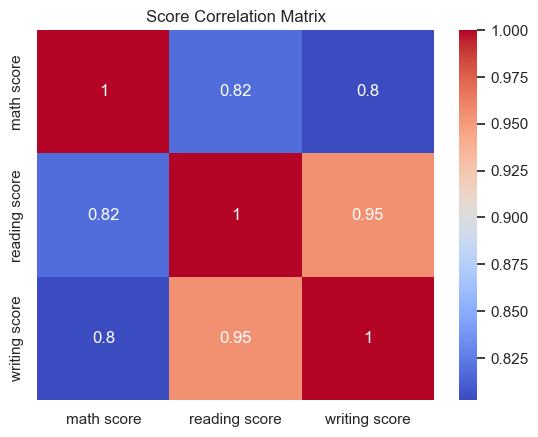

Reading & Writing Correlation: 0.9545980771462476
Math & Writing Correlation: 0.8026420459498075


In [28]:
corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Score Correlation Matrix")
plt.show()

print("Reading & Writing Correlation:", corr.loc['reading score', 'writing score'])
print("Math & Writing Correlation:", corr.loc['math score', 'writing score'])

### 7. Identify the top 5% performing students and analyze their demographic profiles. What patterns emerge?

In [30]:
top_5 = df[df['average score'] >= df['average score'].quantile(0.95)]
top_5_profiles = top_5[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
print(top_5_profiles.value_counts().head(10))

gender  race/ethnicity  parental level of education  lunch     test preparation course
female  group E         associate's degree           standard  none                       3
        group C         bachelor's degree            standard  completed                  2
        group B         associate's degree           standard  completed                  2
        group E         master's degree              standard  completed                  2
        group D         master's degree              standard  none                       2
        group C         some college                 standard  completed                  2
male    group C         associate's degree           standard  completed                  2
female  group E         associate's degree           standard  completed                  2
male    group C         bachelor's degree            standard  completed                  2
                        associate's degree           standard  none                  

### 8. Can we cluster students into performance categories (e.g., low, medium, high performers) using just Pandas logic? If yes, how?

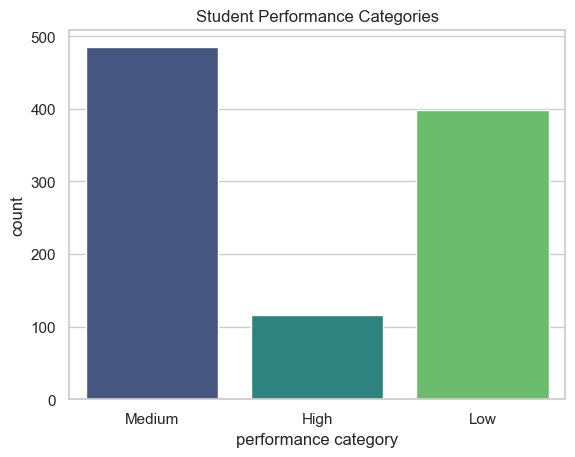

In [33]:
# Create performance categories
def categorize(score):
    if score >= 85:
        return 'High'
    elif score >= 65:
        return 'Medium'
    else:
        return 'Low'

df['performance category'] = df['average score'].apply(categorize)

# Visualize
sns.countplot(data=df, x='performance category', hue='performance category', palette='viridis', legend=False)
plt.title("Student Performance Categories")
plt.show()

## *Visualizing Dataset*

In [35]:
# Dataset is PREPARED.
# Now we have to convert the findings into an interactive Power BI dashboard.
# The dataframe which we get, have to convert into excel file. 

In [36]:
# Export the updated dataset with new columns
df.to_csv("StudentsPerformance_Cleaned.csv", index=False)